In [1]:
%matplotlib widget
# %matplotlib qt
from bmcs_shell.api import WBGeoUtils, WBCell4ParamFlat, WBTessellation4PV2Flat, WBTessellation4PFlat, WBCell4ParamV2, WbParamDesigner, WBTessellation4P, WBTessellation4PV2, WBCell4Param
from bmcs_utils.api import Extruder
import numpy as np
import k3d
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
WBTessellation4PV2Flat().interact()

C:\Users\hspartali\Anaconda3\envs\bmcs_env\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


IndexError: index 105 is out of bounds for axis 0 with size 72

ValueError: cannot reshape array of size 312 into shape (13,6,3)

ValueError: cannot reshape array of size 312 into shape (13,6,3)

ValueError: cannot reshape array of size 312 into shape (13,6,3)

In [2]:
WBTessellation4PV2().interact()

C:\Users\hspartali\Anaconda3\envs\bmcs_env\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


In [5]:
shell = WBTessellation4P()
shell.interact()

In [2]:
WBTessellation4PFlat().interact()

C:\Users\hspartali\Anaconda3\envs\bmcs_env\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in sqrt
  return arcsin((-a*sin(2*arcsin((a*tan(gamma) - a/cos(gamma) + c*cos(gamma))/sqrt(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)))*tan(gamma) + a*sin(2*arcsin((a*tan(gamma) - a/cos(gamma) + c*cos(gamma))/sqrt(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)))/cos(gamma) - sqrt(-a**2*sin(gamma)**2 + 2*a**2*sin(gamma) - a**2 - b**2*sin(gamma)**2 + b**2)*cos(2*arcsin((a*tan(gamma) - a/cos(gamma) + c*cos(gamma))/sqrt(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)))*abs(cos(gamma))/cos(gamma)**2)/(a*(-tan(gamma) + cos(gamma)**(-1.0)) + sqrt(-a**2*(-tan(gamma) + cos(gamma)**(-1.0))**2 + b**2)*(-2*a*(-(a*tan(gamma) - a/cos(gamma) + c*cos(gamma))**2/(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2) + 1)*tan(gamma) + 2*a*(-(a*tan(gamma) - a/cos(gamma) + c*cos(gamma))**2/(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2) + 1)/cos(gamma) + a*(-tan(gamma) + cos(gamma)**(-1.0)) + a*tan(gamma) - a

In [1]:
from bmcs_shell.api import WBCell4ParamFlat, WBTessellation4PFlat
WBCell4ParamFlat().interact()

C:\Users\hspartali\Anaconda3\envs\bmcs_env\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

Attention: Warnings are suppressed!
a = 20.0
--------------------------------
gamma = 10.0°, path length= 1
gamma = 18.3°, path length= 1
gamma = 26.7°, path length= 1
gamma = 35.0°, path length= 1
gamma = 43.3°, path length= 1
gamma = 51.7°, path length= 1
gamma = 60.0°, path length= 1
gamma = 68.3°, path length= 1
gamma = 76.7°, path length= 1
gamma = 85.0°, path length= 1
a = 54.3
--------------------------------
gamma = 10.0°, path length= 10
gamma = 18.3°, path length= 9
gamma = 26.7°, path length= 9
gamma = 35.0°, path length= 9
gamma = 43.3°, path length= 9
gamma = 51.7°, path length= 9
gamma = 60.0°, path length= 10
gamma = 68.3°, path length= 13
gamma = 76.7°, path length= 13
gamma = 85.0°, path length= 10
a = 88.6
--------------------------------
gamma = 10.0°, path length= 11
gamma = 18.3°, path length= 11
gamma = 26.7°, path length= 11
gamma = 35.0°, path length= 11
gamma = 43.3°, path length= 10
gamma = 51.7°, path length= 11
gamma = 60.0°, path length= 12
gamma = 68.3°, p

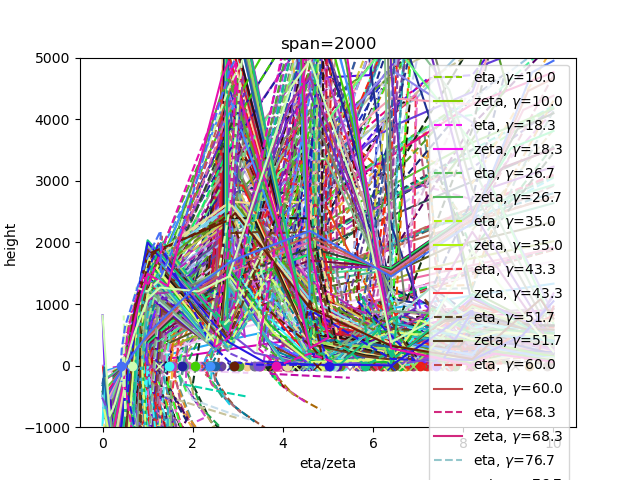

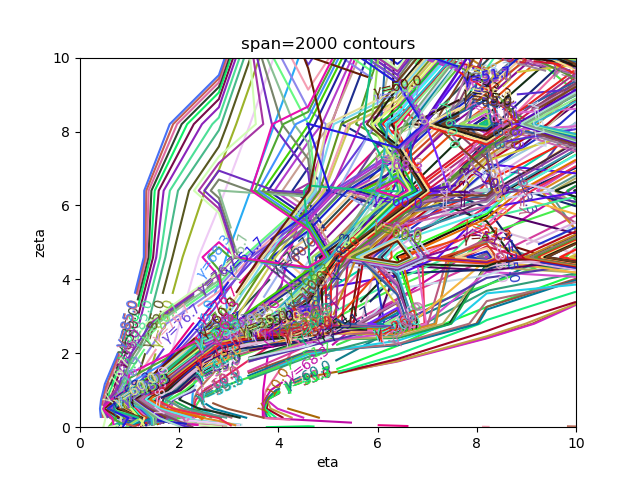

In [2]:
wb_p = WbParamDesigner(n=10, 
         n_mid_cells=5, 
         a_range = np.linspace(20, 500, 15),
         gamma_range=np.linspace(10, 85, 10),
         var1={'name':'span', 'value':2000},
         var2={'name':'height', 'value':0}, # r/s = 1/4.5
         var3={'name':'width', 'value':530})
valid_params = wb_p.calc_valid_params()
# wb_p.plot_eta_zeta_var1(a_i=0, gamma_i=0)

[{'a': 191.42857142857142,
  'b': 246.2163984368867,
  'c': 119.01964738989646,
  'gamma': 0.6809886241736514,
  'n_phi_plus': 6}]

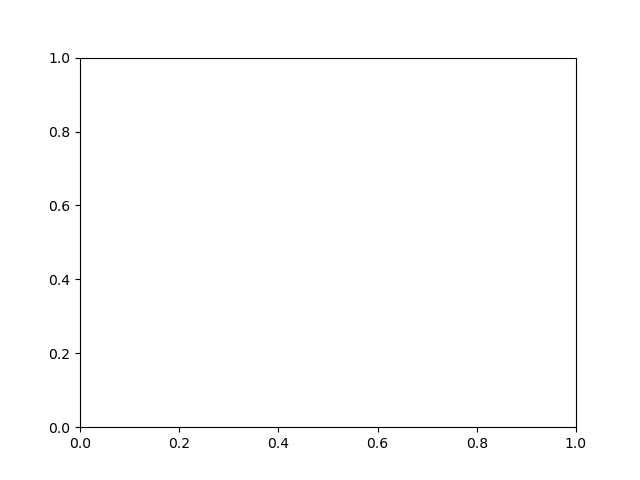

In [3]:
fig, ax = plt.subplots()
no_nan_valid_params = []
for i, params in enumerate(valid_params):
    if not np.isnan(list(params.values())).any():
        no_nan_valid_params.append(params)
no_nan_valid_params

In [131]:
a = 100
params = no_nan_valid_params[0]
wbt4p = WBTessellation4P(
#                          a=100,
#                          b = 5.492 * a, 
#                          c = 1.8466 * a, 
#                          gamma=np.deg2rad(54.53), 
#                          n_phi_plus=3, 
                        **params,
                         n_x_plus=2, 
                         wireframe_width=5, trim_ext_facets=False,
                                 trim_half_cells_along_y=True,
                                 trim_half_cells_along_x=True,
                                 align_outer_nodes_along_x=True)
wbt4p.interact()

In [130]:
import sympy as sp
c = wbt4p.wb_cell.symb.c
gamma = wbt4p.wb_cell.symb.gamma
a = wbt4p.wb_cell.symb.a

c_flat_plate = sp.solve(wbt4p.wb_cell.symb.u_3_ -(c * sp.cos(gamma)), c)
c_flat_plate[0]

a*(1 - sin(gamma))/cos(gamma)**2

In [132]:
def get_c_flat(gamma, a):
    return a*(1 - np.sin(gamma))/np.cos(gamma)**2
get_c_flat(0.679, 500)

307.12245152172557

In [12]:
WBGeoUtils.export_obj_file(wbt4p, 'span_2000_w_500_h_300_a_150_4_cells.obj')

In [12]:
wb_p.get_shell_height(wbt4p)

29.9599609375

In [11]:
wb_p.get_shell_width(wbt4p)

532.7175049588056

In [10]:
wb_p.get_span(wbt4p)

1995.0379638671875